In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [3]:
# Load the dataset
wine_df = pd.read_csv('winequality-white.csv', sep=';')

<Axes: >

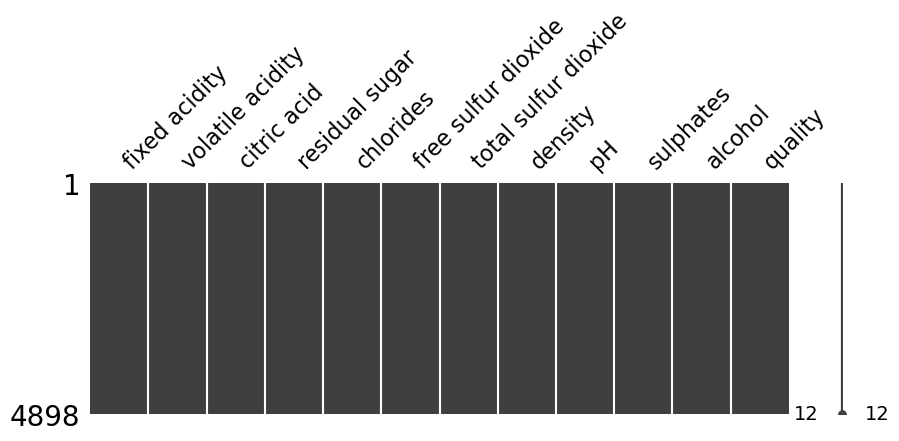

In [5]:
# Missing data detection
msno.matrix(wine_df, figsize=(10, 3))

<Axes: ylabel='quality'>

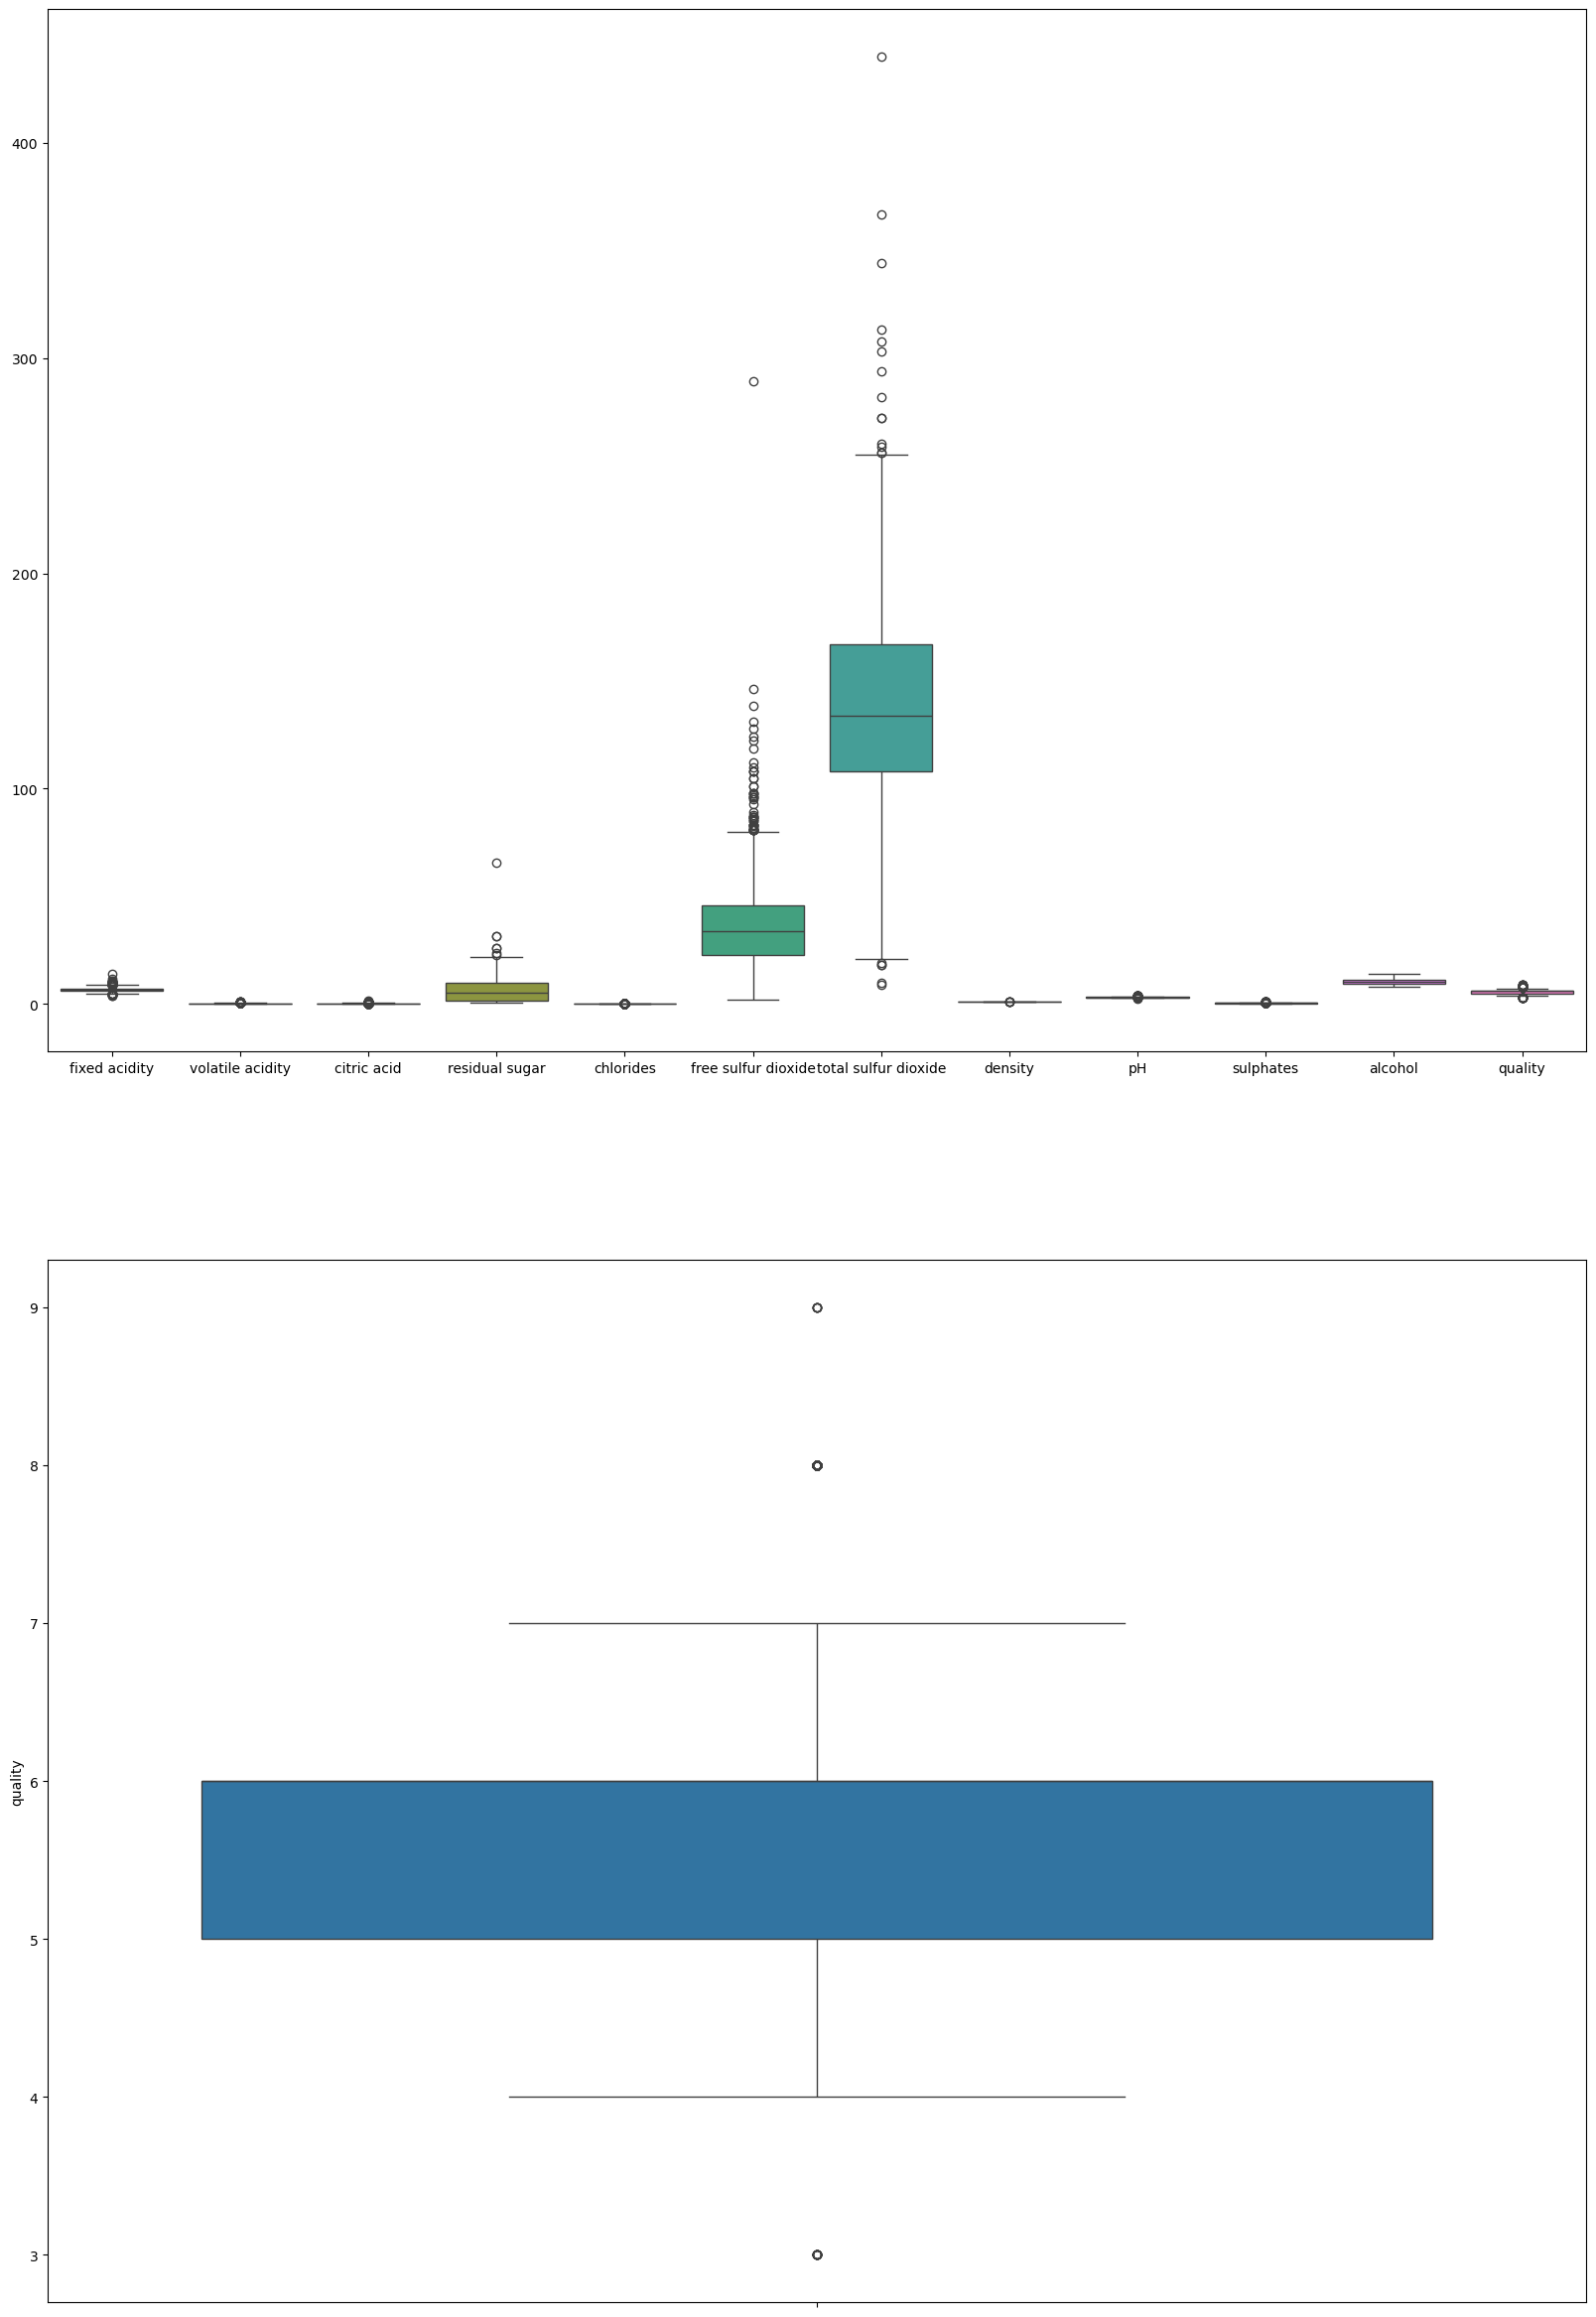

In [7]:
# Boxplot to check for outliers and distribution
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(20, 30)
sns.boxplot(data=wine_df, orient="v", ax=axes[0])  # To see if we need to scale our data
sns.boxplot(data=wine_df, y="quality", orient="pH", ax=axes[1])  # To see the distribution of quality


<Axes: >

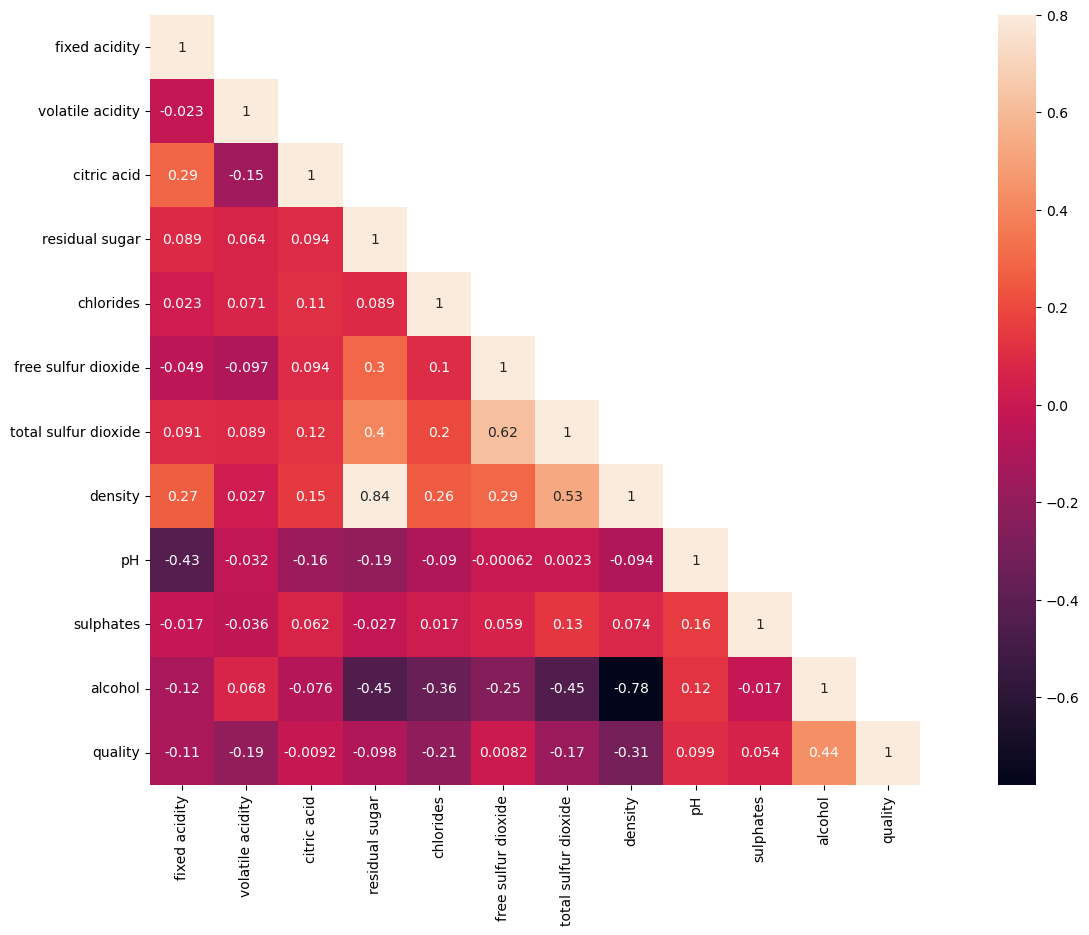

In [9]:
# Correlation matrix to see the relationships between features
corr_mat = wine_df.corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corr_mat, mask=mask, vmax=0.8, square=True, annot=True)

In [11]:
# Handling outliers (IQR method)
Q1 = wine_df.quantile(0.25)
Q3 = wine_df.quantile(0.75)
IQR = Q3 - Q1
wine_df_filtered = wine_df[~((wine_df < (Q1 - 1.5 * IQR)) | (wine_df > (Q3 + 1.5 * IQR))).any(axis=1)]

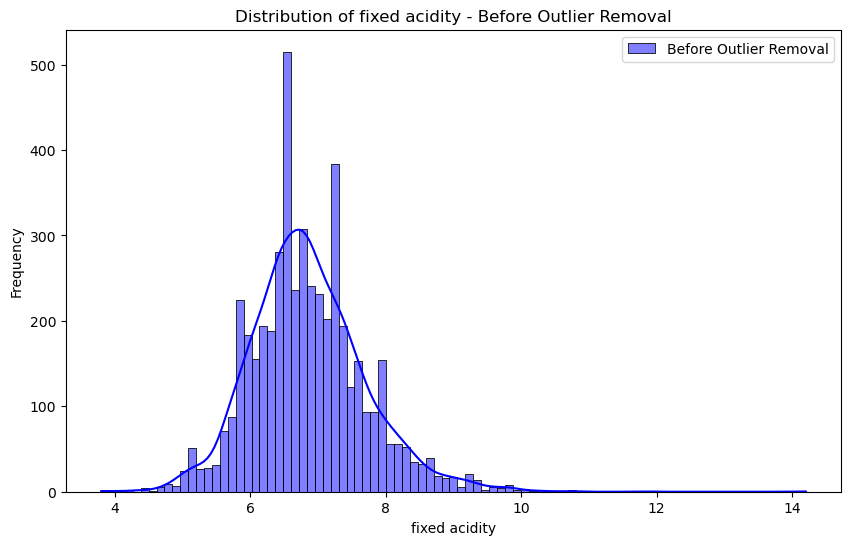

In [37]:
# Plotting the distribution of a specific feature before and after handling outliers
feature_name = 'fixed acidity'  # You can change this to any feature you're interested in

# Before handling outliers
plt.figure(figsize=(10, 6))
sns.histplot(wine_df[feature_name], kde=True, color='blue', label='Before Outlier Removal')
plt.title(f'Distribution of {feature_name} - Before Outlier Removal')
plt.xlabel(f'{feature_name}')
plt.ylabel('Frequency')
plt.legend()
plt.show()

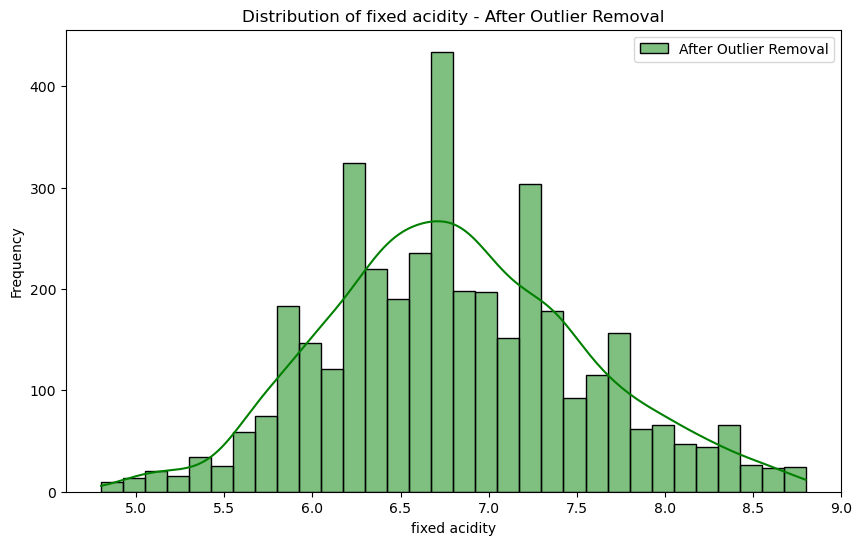

In [39]:
# After handling outliers
plt.figure(figsize=(10, 6))
sns.histplot(wine_df_filtered[feature_name], kde=True, color='green', label='After Outlier Removal')
plt.title(f'Distribution of {feature_name} - After Outlier Removal')
plt.xlabel(f'{feature_name}')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [13]:
# Splitting the data into features and target variable
X = wine_df_filtered.iloc[:, :-1]
y = wine_df_filtered.iloc[:, -1]


In [15]:
# Adding a constant column for the intercept in the linear regression model
X = np.append(arr=np.ones((X.shape[0], 1)), values=X, axis=1)

In [17]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Fitting the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predicting on the test set
y_pred = lr.predict(X_test)

In [25]:
# Calculating accuracy (R² score)
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2}")

R² score: 0.2331577975290674


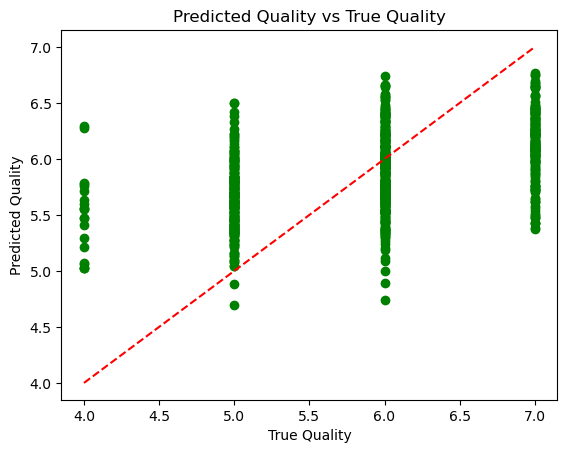

In [31]:
# Scatter plot of predicted vs true quality
plt.scatter(y_test, y_pred, c='g')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality vs True Quality')
# Adding a line for perfect predictions (y_test == y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

In [35]:
#Steps Included:
#Missing Data Detection: Visualizes missing data using missingno.
#Boxplot: Visualizes the distribution of features and quality.
#Correlation Matrix: Shows relationships between features.
#Outlier Detection: Removes outliers using the IQR method.
#Data Splitting: Splits the data into training and testing sets.
#Data Scaling: Scales the features using StandardScaler.
#Model Training: Fits the linear regression model.
#Model Prediction: Makes predictions on the test set.
#Model Accuracy: Prints the R² score.
#Visualization: Plots a scatter plot comparing the true vs predicted wine quality.